In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

Text(0.5, 0, 'z')

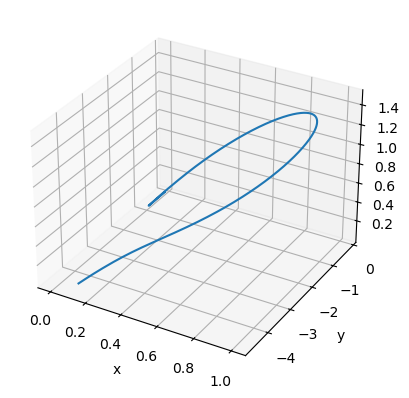

In [174]:
def df(t,vec):
  omr = vec[0]
  x = vec[1]
  y = vec[2]
  z = vec[3]
  p = vec[4]
  om = 1 - omr - x**2/6. - z*p**4/3. - x**2*y
  hp = -((3*om*(1 + 6*y) + 4*omr*(1 + 6*y) + x*(x + 12*x*y + 27*x*y**2 + 4*p**3*y*z))/(2 + 12*y + 3*x**2*y**2))
  # d = dOmega_r, dx, dy, dz, dp
  d = np.empty(len(vec))
  d[0] = -4*omr - 2*hp*omr
  d[1] = -((-((x + 9*x*y)*(3*om + 4*omr + x**2*(1 + 3*y))) + (2 - x**2*y)*(x*(3 + 9*y) + 4*p**3*z))/(2 + 12*y + 3*x**2*y**2))
  d[2] = 2*hp*y + xiv0*d[1]/z
  d[3] = -2*hp*z
  d[4] = x
  return d

xiv0 = -2
phi_i = 1

omr_i = 1-1e-9
x_i = 0
y_i = -0.2
z_i = 1e-7
p_i = 1

ti=0
tf=10
ts = np.linspace(ti,tf,num=6000)
sol = solve_ivp(df, t_span=[ti,tf], y0=[omr_i,x_i,y_i,z_i,p_i], t_eval=ts)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol.y[1], sol.y[2], sol.y[3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Text(0.5, 0, 'z2')

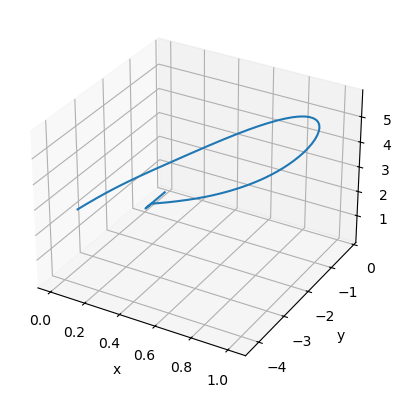

In [166]:
def df(t,vec):
  omr = vec[0]
  x = vec[1]
  y = vec[2]
  z1 = vec[3]
  z2 = vec[4]
  z3 = vec[5]
  om = 1 - omr - x**2/6 - z1/3 - x**2*y
  hp = -((9*om*(1 + 6*y) + 12*omr*(1 + 6*y) + x*(x*(3 + 36*y + 81*y**2) + 2*np.sqrt(3)*y*np.sqrt(z1*z2)))/(6 + 36*y + 9*x**2*y**2))
  # d = dOmega_r, dx, dy, dz1, dz2, dz3
  d = np.empty(len(vec))
  d[0] = -4*omr - 2*hp*omr
  d[1] = -((-((x + 9*x*y)*(3*om + 4*omr + x**2*(1 + 3*y))) + (2 - x**2*y)*(x*(3 + 9*y) + (2*np.sqrt(z1*z2))/np.sqrt(3)))/(2 + 12*y + 3*x**2*y**2))
  d[2] = 2*hp*y + 24*xiv0*d[1]/z3
  d[3] = -2*hp*z1 + x*np.sqrt(4/3*z1*z2)
  d[4] = -2*hp*z2 + x*np.sqrt(2*z2*z3)
  d[5] = -2*hp*z3
  return d

xiv0 = -2
phi_i = 1

omr_i = 1-1e-9
x_i = 1e-7
y_i = -0.2
z1_i = 1e-7
z2_i = 4*z1_i/phi_i**2
z3_i = 24*z1_i/phi_i**4

ti=0
tf=10
ts = np.linspace(ti,tf,num=500)
sol = solve_ivp(df, t_span=[ti,tf], y0=[omr_i,x_i,y_i,z1_i,z2_i,z3_i], t_eval=ts)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol.y[1], sol.y[2], sol.y[3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z2')


-1.3632581582166905e-08


[Text(-10, 0, '$10^{-10}$'),
 Text(-6, 0, '$10^{-6}$'),
 Text(-4, 0, '$10^{-4}$'),
 Text(-2, 0, '$10^{-2}$'),
 Text(0, 0, '1')]

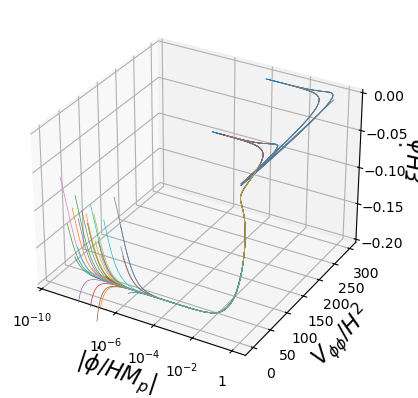

In [237]:
def df(t,vec):
  omr = vec[0]
  x = vec[1]
  z = vec[2]
  p = vec[3]
  om = 1 - omr - x**2/6. - z*p**4/3. - x**2*xiv0*x/z
  hp = -((27*x**4*xiv0**2 + 6*(3*om + 4*omr)*x*xiv0*z + 12*x**3*xiv0*z + (3*om + 4*omr)*z**2 + x**2*(1 + 4*p**3*xiv0)*z**2)/(3*x**4*xiv0**2 + 12*x*xiv0*z + 2*z**2))
  # d = dOmega_r, dx, dy, dz, dp
  d = np.empty(len(vec))
  d[0] = -4*omr - 2*hp*omr
  d[1] = (36*x**5*xiv0**2 + 9*(-2 + 3*om + 4*omr)*x**2*xiv0*z + 15*x**4*xiv0*z + (-6 + 3*om + 4*omr)*x*z**2 + x**3*(1 + 4*p**3*xiv0)*z**2 - 8*p**3*z**3)/(3*x**4*xiv0**2 + 12*x*xiv0*z + 2*z**2)
  d[2] = -2*hp*z
  d[3] = x
  return d

xiv0 = -1

omr_i = 1-1e-9
p_i = 0.7
z_i = 1e-7
x_i = (-1+np.sqrt(1-9.6*xiv0*p_i**4))/6/xiv0*z_i
print(x_i)

ti=0
tf=5
ts = np.linspace(ti,tf,num=10000)
ax = plt.figure().add_subplot(projection='3d')
for i in range(30):
  # x_i = np.random.uniform(1,1)*(-0.136/xiv0*z_i)
  z_i = 10**np.random.uniform(-5,-8)
  x_c = (-1+np.sqrt(1-9.6*xiv0*p_i**4))/6/xiv0*z_i
  x_i = x_c * np.random.normal(1, 0.3)
  # p_i = np.random.normal(0.6, 0.1) 
  sol = solve_ivp(df, t_span=[ti,tf], y0=[omr_i,x_i,z_i,p_i], t_eval=ts)
  ax.plot(np.log10(np.abs(sol.y[1])), 12*sol.y[2]*sol.y[-1]**2, sol.y[1]/sol.y[2],lw=0.5)
ax.set_xlabel(r'$|\dot{\phi}/HM_p|$',fontsize=16)
ax.set_ylabel(r'$V_{\phi\phi}/H^2$',fontsize=16)
ax.set_zlabel(r'$\xi H\dot{\phi}$',fontsize=16)
ax.set_zlim(-0.2,0)
ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0])
ax.set_xticks([-10,-6, -4, -2, 0])
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$', '1'])


-7.440700637478683e-08


(0.0, 0.15)

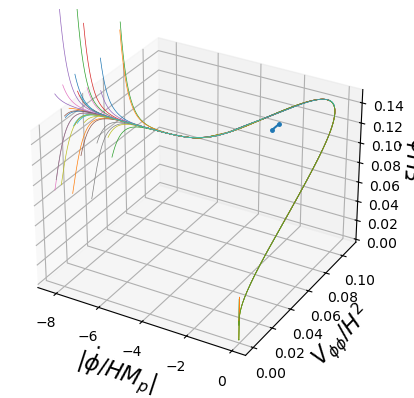

In [304]:
def df(t,vec):
  omr = vec[0]
  x = vec[1]
  z = vec[2]
  lmd = vec[3]
  y = 256*xiv0*x/(z*lmd**4)
  om = 1 - omr - x**2/6. - z/3. - x**2*y
  hp = -((3*om*(1 + 6*y) + 4*omr*(1 + 6*y) + x*(x + 12*x*y + 27*x*y**2 + lmd*y*z))/(2 + 12*y + 3*x**2*y**2))
  # d = dOmega_r, dx, dy, dz, dp
  d = np.empty(len(vec))
  d[0] = -4*omr - 2*hp*omr
  d[1] = -((-((x + 9*x*y)*(3*om + 4*omr + x**2*(1 + 3*y))) + (2 - x**2*y)*(x*(3 + 9*y) + lmd*z))/(2 + 12*y + 3*x**2*y**2))
  d[2] = -2*hp*z + lmd*z*x
  d[3] = -0.25*lmd**2*x
  return d

xiv0 = -1
phi_i = 0.7

omr_i = 1-1e-9
z_i = 1e-7
l_i = 4/phi_i
x_i = (-1+np.sqrt(1-9.6*xiv0*phi_i**3))/6/xiv0/256*z_i*l_i**4
print(x_i)

ti=0
tf=4
ts = np.linspace(ti,tf,num=10000)
ax = plt.figure().add_subplot(projection='3d')
for i in range(30):
  # x_i = np.random.uniform(1,1)*(-0.136/xiv0*z_i)
  z_i = 10**np.random.uniform(-5,-8)
  x_c = (-1+np.sqrt(1-9.6*xiv0*phi_i**3))/6/xiv0/256*z_i*l_i**4
  x_i = x_c * np.random.normal(1, 0.3)
  # p_i = np.random.normal(0.6, 0.1) 
  sol = solve_ivp(df, t_span=[ti,tf], y0=[omr_i,x_i,z_i,l_i], t_eval=ts)
  ax.plot(np.log10(np.abs(sol.y[1])), sol.y[2]/3, 256*xiv0*sol.y[1]/sol.y[2]/sol.y[3]**4,lw=0.5)

def f(xvec, omr):
    x = xvec[0]
    z = xvec[1]
    y = np.empty(2)
    y[0] = 18*x**14*xiv0**2 + 15*x**9*xiv0*z + 2*x**7*xiv0*(9 + 9*omr - 13*z)*z + x**4*z**2 + 16*z**3 - 2*x**2*z**2*(3 - omr + z)
    y[1] = -6*x**12*xiv0**2 - 12*x**7*xiv0*z - x**2*z**2 + 2*z**2*(1 - omr + z) + 4*x**5*xiv0*z*(3 - 3*omr + 5*z)
    return y
num = 2
xz = np.empty([num,2])
omrs = np.linspace(0,1,num=num, endpoint=True)
for i, val in enumerate(omrs):
    r = root(f, x0=[0.5, 0.2], args=(val,)) 
    xz[i,:] = r.x
ax.plot(np.log10(xz[:,0]), xz[:,1]/3, -xiv0*xz[:,0]**5/xz[:,1],marker='.',ms=5)
ax.set_xlabel(r'$|\dot{\phi}/HM_p|$',fontsize=16)
ax.set_ylabel(r'$V_{\phi\phi}/H^2$',fontsize=16)
ax.set_zlabel(r'$\xi H\dot{\phi}$',fontsize=16)
ax.set_zlim(0,0.15)
# ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0])
# ax.set_xticks([-10,-6, -4, -2, 0])
# ax.set_xticklabels([r'$10^{-10}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$', '1'])


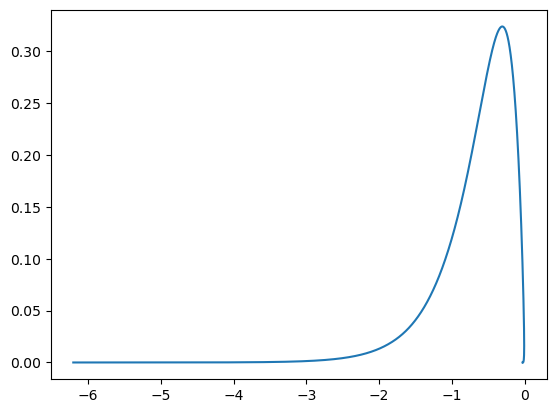

In [265]:
plt.plot(np.log10(np.abs(sol.y[1])), sol.y[2])
# plt.plot(sol.t, sol.y[1]/sol.y[2])
# plt.plot(sol.t, 256*xiv0*sol.y[1]/sol.y[2]/sol.y[3]**4)
# plt.ylim(-1,1)

In [291]:
def f(xvec, omr):
    x = xvec[0]
    z = xvec[1]
    y = np.empty(2)
    y[0] = 18*x**14*xiv0**2 + 15*x**9*xiv0*z + 2*x**7*xiv0*(9 + 9*omr - 13*z)*z + x**4*z**2 + 16*z**3 - 2*x**2*z**2*(3 - omr + z)
    y[1] = -6*x**12*xiv0**2 - 12*x**7*xiv0*z - x**2*z**2 + 2*z**2*(1 - omr + z) + 4*x**5*xiv0*z*(3 - 3*omr + 5*z)
    return y

num = 100
xz = np.empty([num,2])
omrs = np.linspace(0,1,num=num)
for i, val in enumerate(omrs):
    r = root(f, x0=[0.5, 0.2], args=(val,)) 
    xz[i,:] = r.x
print(xz)

[[0.45494836 0.11592229]
 [0.45511902 0.11613912]
 [0.45528957 0.1163561 ]
 [0.45545998 0.11657325]
 [0.45563027 0.11679057]
 [0.45580043 0.11700804]
 [0.45597047 0.11722567]
 [0.45614038 0.11744347]
 [0.45631016 0.11766143]
 [0.45647982 0.11787955]
 [0.45664936 0.11809783]
 [0.45681877 0.11831627]
 [0.45698805 0.11853487]
 [0.45715721 0.11875363]
 [0.45732625 0.11897256]
 [0.45749516 0.11919165]
 [0.45766395 0.11941089]
 [0.45783262 0.1196303 ]
 [0.45800116 0.11984987]
 [0.45816958 0.1200696 ]
 [0.45833788 0.12028949]
 [0.45850606 0.12050955]
 [0.45867411 0.12072976]
 [0.45884204 0.12095013]
 [0.45900985 0.12117067]
 [0.45917754 0.12139136]
 [0.4593451  0.12161222]
 [0.45951255 0.12183323]
 [0.45967987 0.12205441]
 [0.45984707 0.12227574]
 [0.46001416 0.12249724]
 [0.46018112 0.1227189 ]
 [0.46034796 0.12294071]
 [0.46051468 0.12316269]
 [0.46068129 0.12338483]
 [0.46084777 0.12360712]
 [0.46101413 0.12382958]
 [0.46118038 0.1240522 ]
 [0.4613465  0.12427497]
 [0.46151251 0.12449791]
